# テーブルデータとしてモデリングする
+ `tFIDF`を用いてベクトル化
+ `PCA`による次元削減

### 前処理
---

In [5]:
import pandas as pd 
from src.processing.table import TfIdf, PCA_
import os 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
import numpy as np 

In [44]:
root = os.path.join("data", "processed", "prep_from_raw")
train = pd.read_csv(root+"/prep_train.csv").iloc[:5600, :]
test = pd.read_csv(root+"/prep_test.csv")

x_train, x_val_test, y_train, y_val_test = train_test_split(train.drop(["judgement"], axis=1), train[["judgement"]], 
                                                           stratify=train.judgement, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, 
                                               stratify=y_val_test, test_size=0.5, random_state=42)

print(x_train.shape[0], x_val.shape[0], x_test.shape[0], test.shape[0])

3360 1120 1120 40834


In [45]:
tf = TfIdf()
pca = PCA_()

x_train = tf.transform(x_train)
x_val = tf.transform(x_val)
x_test = tf.transform(x_test)

MemoryError: Unable to allocate 545. MiB for an array with shape (3360, 21254) and data type float64

In [2]:
# ローカル環境だとメモリ不足のため、google colab で実装したものを読み込みする
x_train = np.load("./data/processed/table/x_train.npy")
x_test = np.load("./data/processed/table/x_test.npy")
y_train = np.load("./data/processed/table/y_train.npy")
y_test = np.load("./data/processed/table/y_test.npy")
x_val = np.load("./data/processed/table/x_val.npy")
y_val = np.load("./data/processed/table/y_val.npy")

In [2]:
np.save("./data/processed/table/x_train", x_train)
np.save("./data/processed/table/x_val", x_val)
np.save("./data/processed/table/y_train", y_train)
np.save("./data/processed/table/y_val", y_val)

NameError: name 'x_train' is not defined

### training 
---

In [6]:
from src.modeling.pipline import ModelPipline

In [26]:
pip_model = ModelPipline(model_type="classifier")
pip_model.predict(x_train, y_train, x_test, y_test)

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[20:09:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/kooose/.local/lib/python3.8/site-packages/

In [27]:
from src.modeling.model_xgb import XGBoost 
import xgboost as xgb 

xgb_ = XGBoost()
model_xgb = xgb_.fit(x_train, y_train, x_val, y_val)

[20:22:25] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.62193	eval-logloss:0.62282
[1]	train-logloss:0.56293	eval-logloss:0.56631
[2]	train-logloss:0.51367	eval-logloss:0.51942
[3]	train-logloss:0.46919	eval-logloss:0.47575
[4]	train-logloss:0.43123	eval-logloss:0.43939
[5]	train-logloss:0.39952	eval-logloss:0.40925
[6]	train-logloss:0.36986	eval-logloss:0.38057
[7]	train-logloss:0.34412	eval-logloss:0.35703
[8]	train-logloss:0.32275	eval-logloss:0.33677
[9]	train-logloss:0.30245	eval-logloss:0.31770
[10]	train-logloss:0.28464	eval-logloss:0.30076
[11]	train-logloss:0.26892	eval-logloss:0.28578
[12]	train-logloss:0.25299	eval-logloss:0.27157
[13]	train-logloss:0.23916	eval-logloss:0.25876
[14]	train

In [28]:
dtest = xgb.DMatrix(x_test)
proba = model_xgb.predict(dtest)
pred = np.where(proba >= .5, 1, 0).astype(int)

from sklearn.metrics import classification_report
from pprint import pprint 

pprint(classification_report(pred, y_test))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.99      0.98      0.98      2122\n'
 '           1       0.87      0.93      0.90       311\n'
 '\n'
 '    accuracy                           0.97      2433\n'
 '   macro avg       0.93      0.95      0.94      2433\n'
 'weighted avg       0.97      0.97      0.97      2433\n')


### パラメータチューニングする 
---

In [29]:
result = xgb_.parameter_chunning(n_trials=10, num_rounds=50)

import json 
with open("models/xgb_best_parameter.json", "w") as f:
    json.dump(result["best_parameters"], f)

[I 2021-08-30 20:23:08,913] A new study created in memory with name: no-name-a0c92d74-87be-4fd7-9f72-5b7c00519c06


[20:23:08] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68747	eval-logloss:0.68770
[1]	train-logloss:0.68189	eval-logloss:0.68240
[2]	train-logloss:0.67674	eval-logloss:0.67742
[3]	train-logloss:0.67179	eval-logloss:0.67269
[4]	train-logloss:0.66617	eval-logloss:0.66725
[5]	train-logloss:0.66087	eval-logloss:0.66209
[6]	train-logloss:0.65555	eval-logloss:0.65689
[7]	train-logloss:0.65028	eval-logloss:0.65187
[8]	train-logloss:0.64524	eval-logloss:0.64689
[9]	train-logloss:0.64025	eval-logloss:0.64201
[10]	train-logloss:0.63513	eval-logloss:0.63717
[11]	train-logloss:0.63021	eval-logloss:0.63227
[12]	train-logloss:0.62595	eval-logloss:0.62816
[13]	train-logloss:0.62109	eval-logloss:0.6234

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:23:25,006] Trial 0 finished with value: 0.4906864149478351 and parameters: {'max_depth': 6, 'colsample_bytree': 0.5190263017695164, 'min_sample_weight': 4.006483661964395, 'gamma': 0.00022859433522173892, 'subsample': 0.7449695777790677, 'alpha': 0.0038333321561566623, 'eta': 0.007501954443620123, 'lambda': 1.7474751375465036}. Best is trial 0 with value: 0.4906864149478351.


[20:23:25] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69229	eval-logloss:0.69232
[1]	train-logloss:0.69137	eval-logloss:0.69146
[2]	train-logloss:0.69047	eval-logloss:0.69059
[3]	train-logloss:0.68953	eval-logloss:0.68970
[4]	train-logloss:0.68854	eval-logloss:0.68874
[5]	train-logloss:0.68748	eval-logloss:0.68771
[6]	train-logloss:0.68645	eval-logloss:0.68669
[7]	train-logloss:0.68542	eval-logloss:0.68567
[8]	train-logloss:0.68451	eval-logloss:0.68479
[9]	train-logloss:0.68356	eval-logloss:0.68389
[10]	train-logloss:0.68262	eval-logloss:0.68300
[11]	train-logloss:0.68169	eval-logloss:0.68211
[12]	train-logloss:0.68079	eval-logloss:0.68125
[13]	train-logloss:0.67982	eval-logloss:0.6803

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:23:38,598] Trial 1 finished with value: 0.6484630479275617 and parameters: {'max_depth': 9, 'colsample_bytree': 0.24179177243329464, 'min_sample_weight': 6.190490166774185, 'gamma': 0.0001702783205227671, 'subsample': 0.801994197228042, 'alpha': 0.05039489598671213, 'eta': 0.0013869861245357324, 'lambda': 4.072912667361452e-06}. Best is trial 0 with value: 0.4906864149478351.


[20:23:38] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68731	eval-logloss:0.68735
[1]	train-logloss:0.68169	eval-logloss:0.68190
[2]	train-logloss:0.67653	eval-logloss:0.67686
[3]	train-logloss:0.67079	eval-logloss:0.67119
[4]	train-logloss:0.66510	eval-logloss:0.66562
[5]	train-logloss:0.65966	eval-logloss:0.66016
[6]	train-logloss:0.65424	eval-logloss:0.65474
[7]	train-logloss:0.64896	eval-logloss:0.64961
[8]	train-logloss:0.64365	eval-logloss:0.64440
[9]	train-logloss:0.63840	eval-logloss:0.63926
[10]	train-logloss:0.63338	eval-logloss:0.63434
[11]	train-logloss:0.62828	eval-logloss:0.62930
[12]	train-logloss:0.62405	eval-logloss:0.62504
[13]	train-logloss:0.61909	eval-logloss:0.6201

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:23:48,889] Trial 2 finished with value: 0.4859617568684173 and parameters: {'max_depth': 3, 'colsample_bytree': 0.6801737161546002, 'min_sample_weight': 6.000075993611755, 'gamma': 0.09122149510449752, 'subsample': 0.9891371330641394, 'alpha': 0.015726578854179506, 'eta': 0.008374496868436816, 'lambda': 0.29087355177892615}. Best is trial 2 with value: 0.4859617568684173.


[20:23:48] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69115	eval-logloss:0.69115
[1]	train-logloss:0.68894	eval-logloss:0.68902
[2]	train-logloss:0.68694	eval-logloss:0.68705
[3]	train-logloss:0.68485	eval-logloss:0.68502
[4]	train-logloss:0.68243	eval-logloss:0.68262
[5]	train-logloss:0.68013	eval-logloss:0.68034
[6]	train-logloss:0.67780	eval-logloss:0.67803
[7]	train-logloss:0.67558	eval-logloss:0.67585
[8]	train-logloss:0.67332	eval-logloss:0.67361
[9]	train-logloss:0.67133	eval-logloss:0.67165
[10]	train-logloss:0.66935	eval-logloss:0.66972
[11]	train-logloss:0.66714	eval-logloss:0.66753
[12]	train-logloss:0.66529	eval-logloss:0.66567
[13]	train-logloss:0.66307	eval-logloss:0.6635

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:23:54,606] Trial 3 finished with value: 0.5960524648342219 and parameters: {'max_depth': 3, 'colsample_bytree': 0.436436456821403, 'min_sample_weight': 1.3910837820057878, 'gamma': 0.36087046265775286, 'subsample': 0.7832901189773454, 'alpha': 0.00045566719139214756, 'eta': 0.0033815142678202898, 'lambda': 0.2628063327422689}. Best is trial 2 with value: 0.4859617568684173.


[20:23:54] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64520	eval-logloss:0.64715
[1]	train-logloss:0.59738	eval-logloss:0.60349
[2]	train-logloss:0.56032	eval-logloss:0.56894
[3]	train-logloss:0.52504	eval-logloss:0.53527
[4]	train-logloss:0.48801	eval-logloss:0.49987
[5]	train-logloss:0.45620	eval-logloss:0.46901
[6]	train-logloss:0.42828	eval-logloss:0.44179
[7]	train-logloss:0.40094	eval-logloss:0.41694
[8]	train-logloss:0.38094	eval-logloss:0.39885
[9]	train-logloss:0.36332	eval-logloss:0.38217
[10]	train-logloss:0.34428	eval-logloss:0.36551
[11]	train-logloss:0.32493	eval-logloss:0.34611
[12]	train-logloss:0.30966	eval-logloss:0.33283
[13]	train-logloss:0.29349	eval-logloss:0.3178

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:24:04,235] Trial 4 finished with value: 0.13095227780300578 and parameters: {'max_depth': 6, 'colsample_bytree': 0.3701978983307309, 'min_sample_weight': 1.0442146944938344, 'gamma': 0.0008731401853192552, 'subsample': 0.8202456221234389, 'alpha': 0.002935864364395358, 'eta': 0.07717846862118066, 'lambda': 0.05925733197263172}. Best is trial 4 with value: 0.13095227780300578.


[20:24:04] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69158	eval-logloss:0.69162
[1]	train-logloss:0.68976	eval-logloss:0.68993
[2]	train-logloss:0.68811	eval-logloss:0.68830
[3]	train-logloss:0.68649	eval-logloss:0.68674
[4]	train-logloss:0.68475	eval-logloss:0.68505
[5]	train-logloss:0.68284	eval-logloss:0.68319
[6]	train-logloss:0.68100	eval-logloss:0.68134
[7]	train-logloss:0.67913	eval-logloss:0.67953
[8]	train-logloss:0.67751	eval-logloss:0.67797
[9]	train-logloss:0.67589	eval-logloss:0.67641
[10]	train-logloss:0.67421	eval-logloss:0.67483
[11]	train-logloss:0.67257	eval-logloss:0.67323
[12]	train-logloss:0.67103	eval-logloss:0.67175
[13]	train-logloss:0.66928	eval-logloss:0.6700

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:24:10,724] Trial 5 finished with value: 0.6153623870356897 and parameters: {'max_depth': 5, 'colsample_bytree': 0.27354699847778985, 'min_sample_weight': 4.984610132094825, 'gamma': 3.0325206929428826e-08, 'subsample': 0.8434757721213031, 'alpha': 0.004814503186400559, 'eta': 0.0026349059741156123, 'lambda': 7.988846628849496e-06}. Best is trial 4 with value: 0.13095227780300578.


[20:24:10] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69159	eval-logloss:0.69164
[1]	train-logloss:0.69000	eval-logloss:0.69009
[2]	train-logloss:0.68836	eval-logloss:0.68854
[3]	train-logloss:0.68675	eval-logloss:0.68697
[4]	train-logloss:0.68500	eval-logloss:0.68530
[5]	train-logloss:0.68310	eval-logloss:0.68345
[6]	train-logloss:0.68129	eval-logloss:0.68161
[7]	train-logloss:0.67943	eval-logloss:0.67981
[8]	train-logloss:0.67780	eval-logloss:0.67823
[9]	train-logloss:0.67618	eval-logloss:0.67667
[10]	train-logloss:0.67456	eval-logloss:0.67512
[11]	train-logloss:0.67292	eval-logloss:0.67353
[12]	train-logloss:0.67137	eval-logloss:0.67206
[13]	train-logloss:0.66976	eval-logloss:0.6704

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:24:16,789] Trial 6 finished with value: 0.6167265568012766 and parameters: {'max_depth': 5, 'colsample_bytree': 0.2310525526558111, 'min_sample_weight': 3.717036026537111, 'gamma': 3.227097654537013e-05, 'subsample': 0.9940786592269085, 'alpha': 2.559642090152664e-05, 'eta': 0.0026166974560854475, 'lambda': 1.3463768176041092e-05}. Best is trial 4 with value: 0.13095227780300578.


[20:24:16] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68093	eval-logloss:0.68154
[1]	train-logloss:0.66859	eval-logloss:0.66981
[2]	train-logloss:0.65699	eval-logloss:0.65879
[3]	train-logloss:0.64508	eval-logloss:0.64747
[4]	train-logloss:0.63269	eval-logloss:0.63575
[5]	train-logloss:0.61962	eval-logloss:0.62289
[6]	train-logloss:0.60778	eval-logloss:0.61141
[7]	train-logloss:0.59550	eval-logloss:0.59973
[8]	train-logloss:0.58576	eval-logloss:0.59049
[9]	train-logloss:0.57553	eval-logloss:0.58086
[10]	train-logloss:0.56599	eval-logloss:0.57191
[11]	train-logloss:0.55641	eval-logloss:0.56277
[12]	train-logloss:0.54730	eval-logloss:0.55445
[13]	train-logloss:0.53839	eval-logloss:0.5458

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:24:21,606] Trial 7 finished with value: 0.35024045367962137 and parameters: {'max_depth': 7, 'colsample_bytree': 0.17918085415441004, 'min_sample_weight': 2.926245594412443, 'gamma': 9.024117386429386e-07, 'subsample': 0.6507564086611658, 'alpha': 2.7637615125314248e-05, 'eta': 0.020542778286285958, 'lambda': 9.274289735409131e-06}. Best is trial 4 with value: 0.13095227780300578.


[20:24:21] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64371	eval-logloss:0.64448
[1]	train-logloss:0.60089	eval-logloss:0.60288
[2]	train-logloss:0.56318	eval-logloss:0.56682
[3]	train-logloss:0.53086	eval-logloss:0.53558
[4]	train-logloss:0.49771	eval-logloss:0.50415
[5]	train-logloss:0.46415	eval-logloss:0.47043
[6]	train-logloss:0.43537	eval-logloss:0.44101
[7]	train-logloss:0.40962	eval-logloss:0.41634
[8]	train-logloss:0.39182	eval-logloss:0.39944
[9]	train-logloss:0.37535	eval-logloss:0.38403
[10]	train-logloss:0.36032	eval-logloss:0.37030
[11]	train-logloss:0.34648	eval-logloss:0.35624
[12]	train-logloss:0.33595	eval-logloss:0.34676
[13]	train-logloss:0.32437	eval-logloss:0.3357

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:24:27,591] Trial 8 finished with value: 0.1752713595406354 and parameters: {'max_depth': 4, 'colsample_bytree': 0.23373576487028158, 'min_sample_weight': 6.622061805876721, 'gamma': 5.9815013672851e-08, 'subsample': 0.9205519034853793, 'alpha': 2.4232243900608922e-05, 'eta': 0.08972612866432514, 'lambda': 0.0019079123162228998}. Best is trial 4 with value: 0.13095227780300578.


[20:24:27] WARNING: ../src/learner.cc:573: 
Parameters: { "n_lambda", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.69055	eval-logloss:0.69065
[1]	train-logloss:0.68772	eval-logloss:0.68795
[2]	train-logloss:0.68516	eval-logloss:0.68546
[3]	train-logloss:0.68252	eval-logloss:0.68292
[4]	train-logloss:0.67952	eval-logloss:0.68000
[5]	train-logloss:0.67665	eval-logloss:0.67719
[6]	train-logloss:0.67377	eval-logloss:0.67435
[7]	train-logloss:0.67088	eval-logloss:0.67159
[8]	train-logloss:0.66806	eval-logloss:0.66881
[9]	train-logloss:0.66549	eval-logloss:0.66633
[10]	train-logloss:0.66285	eval-logloss:0.66388
[11]	train-logloss:0.65999	eval-logloss:0.66105
[12]	train-logloss:0.65756	eval-logloss:0.65870
[13]	train-logloss:0.65479	eval-logloss:0.6560

/home/kooose/.local/lib/python3.8/site-packages/xgboost/core.py:101: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-30 20:24:38,865] Trial 9 finished with value: 0.5728021099446882 and parameters: {'max_depth': 9, 'colsample_bytree': 0.4025738117667017, 'min_sample_weight': 5.486098228809554, 'gamma': 2.0582699712570616e-08, 'subsample': 0.6932527825611472, 'alpha': 3.025423979924897e-05, 'eta': 0.003910933172251059, 'lambda': 6.7778824524680825e-06}. Best is trial 4 with value: 0.13095227780300578.


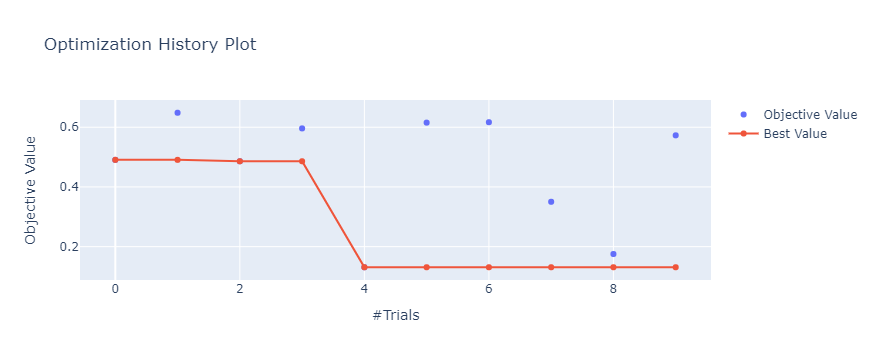

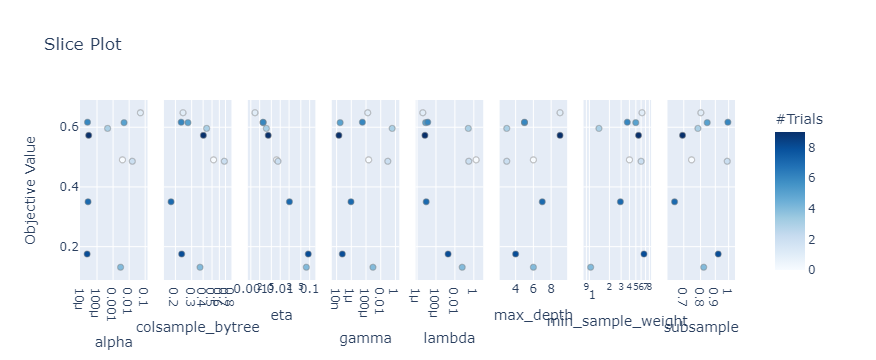

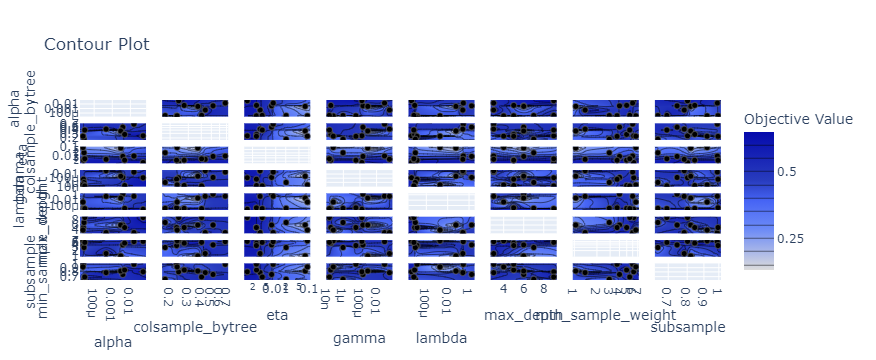

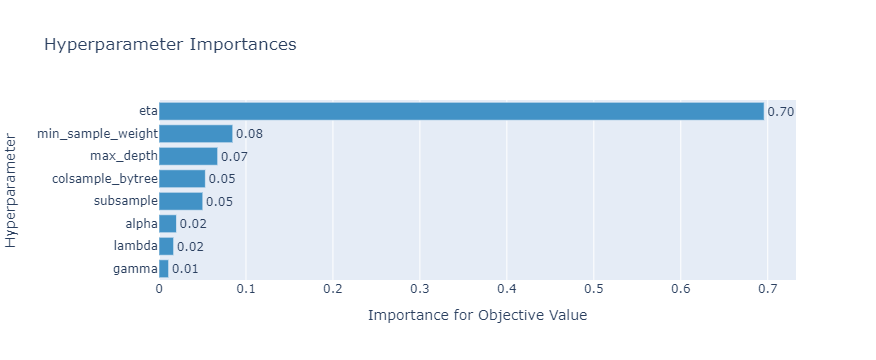

In [30]:
xgb_.show_optuna_viz()

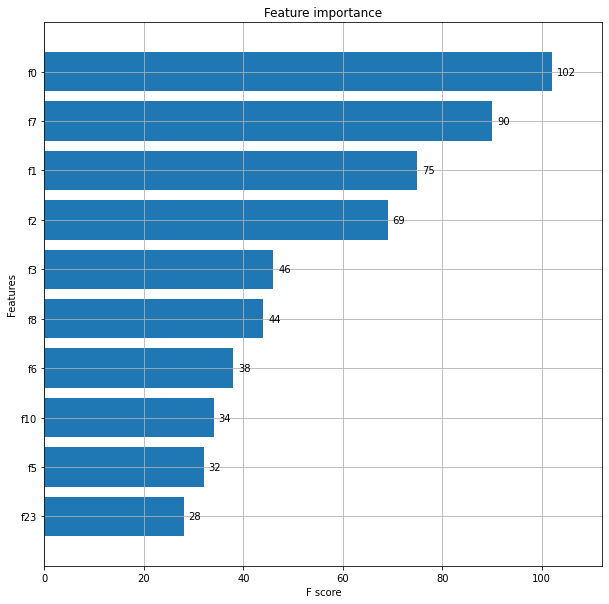

In [31]:
xgb_.show_feature_impotrance()

In [3]:
import json 
with open("./models/xgb_best_parameter.json", "r") as f:
    result = json.load(f)
result 

{'max_depth': 6,
 'colsample_bytree': 0.3701978983307309,
 'min_sample_weight': 1.0442146944938344,
 'gamma': 0.0008731401853192552,
 'subsample': 0.8202456221234389,
 'alpha': 0.002935864364395358,
 'eta': 0.07717846862118066,
 'lambda': 0.05925733197263172}

In [6]:
import xgboost as xgb 
from xgboost import XGBClassifier
from pprint import pprint 

model_xgb_chunning = XGBClassifier(**result)
model_xgb_chunning.fit(x_train, y_train)
pred_ = model_xgb_chunning.predict(x_test)

pprint(classification_report(pred_, y_test))

/home/kooose/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kooose/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn

[20:56:04] WARNING: ../src/learner.cc:573: 
Parameters: { "min_sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:56:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      0.98      0.99      2135\n'
 '           1       0.87      0.97      0.92       298\n'
 '\n'
 '    accuracy                           0.98      2433\n'
 '   macro avg       0.93      0.97      0.95      2433\n'
 'weighted avg       0.98      0.98      0.98      2433\n')


### 検証評価
---

roc score: 0.9889


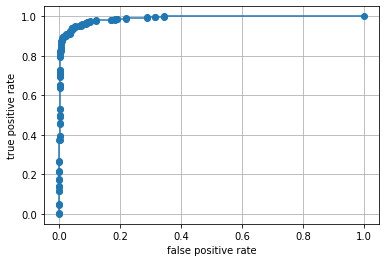

In [34]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns 

proba = model_xgb_chunning.predict_proba(x_test)[:, 1]
score = roc_auc_score(y_test.ravel(), proba)
print(f"roc score: {score:.4f}")
fpr, tpr, thresholds = roc_curve(y_test.ravel(), proba)

plt.plot(fpr, tpr, marker="o")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.grid()

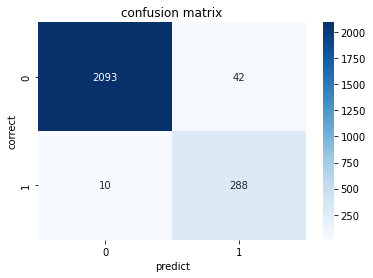

In [35]:
from sklearn.metrics import confusion_matrix 

conf = confusion_matrix(pred_, y_test.ravel())
sns.heatmap(conf, cmap="Blues", annot=True, fmt="")
plt.xlabel("predict")
plt.ylabel("correct")
plt.title("confusion matrix")
plt.show()

### モデルの保存
---

In [36]:
import pickle 
import uuid 
ids = uuid.uuid4()
model_path = os.path.join("models", f"xgb_{str(ids)[:3]}.pkl")
pickle.dump(model_xgb_chunning, open(model_path, "wb"))
print(f"saving complete {model_path}")

saving complete models/xgb_868.pkl


### 大局説明
---

In [7]:
from src.modeling.skater import Surrogate 

In [8]:
exp = Surrogate()
exp.fit(model_xgb_chunning, pd.DataFrame(x_train), y_train, target_names=["Negative", "Positive"])

2021-08-30 20:56:28,130 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2021-08-30 20:56:29,537 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used f1-score
2021-08-30 20:56:29,542 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 0.8780060301551154
2021-08-30 20:56:29,640 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [2, 5, 9, 12]
2021-08-30 20:56:29,651 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (7299,)
2021-08-30 20:56:29,658 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.877; oracle score 1.0
2021-08-30 20:56:29,660 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.123 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower i

忠実度: 0.867379093026442


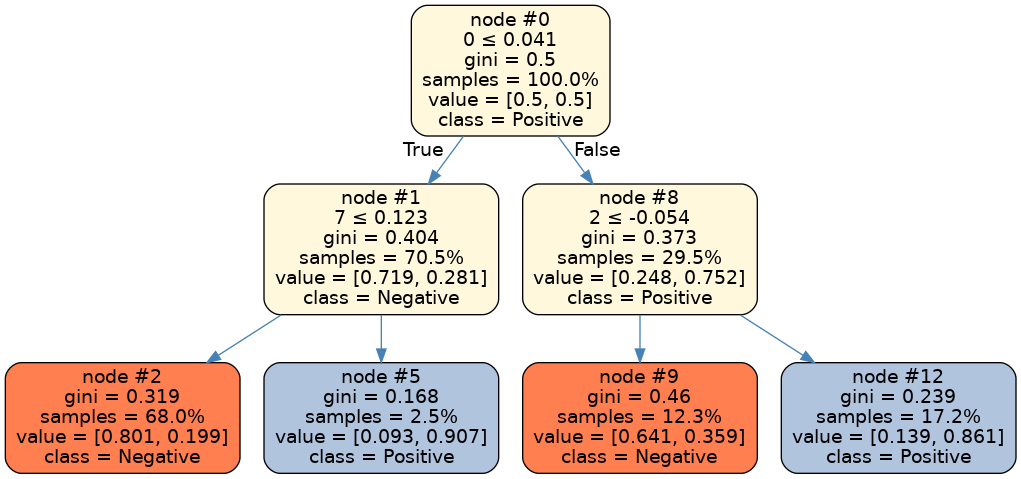

In [10]:
pred_train = model_xgb_chunning.predict(x_train)
print(f"忠実度: {exp.predict(pd.DataFrame(x_train), pred_train)}")

exp.plot()

### テストデータの推論
---

In [22]:
!pip list | grep skater 

skater                  1.1.2b1    
